# Name: Sarmad Hassan

## The Sparks Foundation: Data Science and Business Analytics Internship

### Task 5: Exploratory Data Analysis - Sports

● Perform Exploratory Data Analysis on dataset Indian Premier League

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Import Deliveries Dataset

In [2]:
df_d = pd.read_csv("deliveries.csv")
df_d.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Data Analysis

In [3]:
df_d["Match"] = df_d["batting_team"] + " vs " + df_d["bowling_team"]

In [4]:
# Data Information
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [5]:
# Check Null values
df_d.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
Match                    0
dtype: int64

In [6]:
# Statistical Analysis
df_d.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


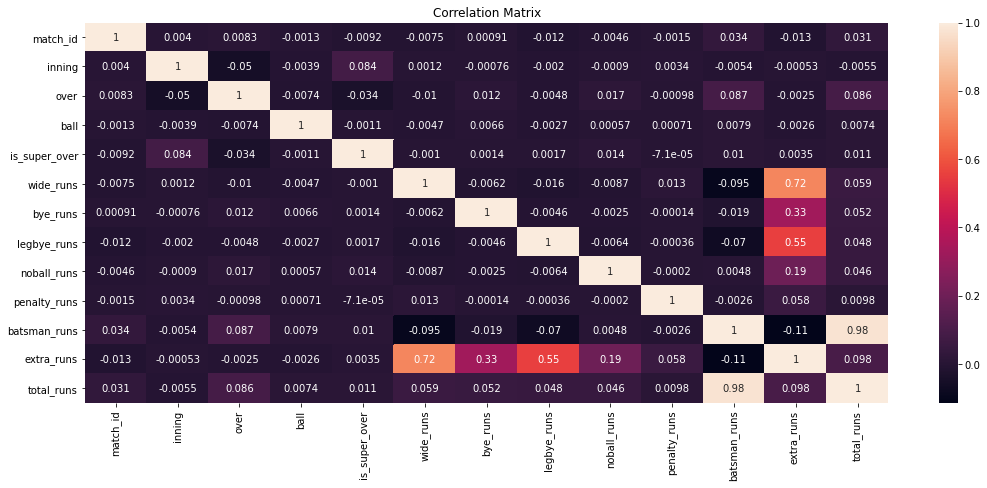

In [7]:
# Correlation
plt.figure(figsize = (18, 7))
correlation = df_d.corr()
sns.heatmap(correlation, annot = True)
plt.title("Correlation Matrix")
plt.show()

**Estimated Batting Team Information**

In [8]:
team_balls = df_d.groupby("batting_team")["ball"].agg(["count"])
team_runs = df_d.groupby("batting_team")["batsman_runs"].agg(["sum"])
wickets = df_d.groupby("batting_team")["player_dismissed"].agg(["count"])
dots = df_d[df_d["batsman_runs"] == 0]
team_dots = dots.groupby("batting_team")["batsman_runs"].agg(["count"])
fours = df_d[df_d["batsman_runs"] == 4]
team_fours = fours.groupby("batting_team")["batsman_runs"].agg(["count"])
sixes = df_d[df_d["batsman_runs"] == 6]
team_sixes = sixes.groupby("batting_team")["batsman_runs"].agg(["count"])
balls_runs = pd.concat([wickets, team_balls, team_runs, team_dots, team_fours, team_sixes], axis = 1).reset_index()
balls_runs.columns = ["Batting Team", "Wickets", "Balls", "Runs", "Dots", "Fours", "Sixes"]
balls_runs["Overs"] = (balls_runs["Balls"] / 6).astype("int")
balls_runs["Matches"] = (balls_runs["Overs"] / 20).astype("int")
balls_runs["Strike Rate"] = (balls_runs["Runs"] / balls_runs["Balls"]) * 100
balls_runs.sort_values(by = "Strike Rate", ascending = False)

,Batting Team,Wickets,Balls,Runs,Dots,Fours,Sixes,Overs,Matches,Strike Rate
2,Delhi Capitals,106,1909,2530,660,242,87,318,15,132.530120
4,Gujarat Lions,188,3566,4629,1345,460,155,594,29,129.809310
13,Royal Challengers Bangalore,1035,20908,26775,8299,2360,1132,3484,174,128.061029
0,Chennai Super Kings,852,19762,25104,7608,2193,973,3293,164,127.031677
5,Kings XI Punjab,1081,20931,26468,8259,2458,976,3488,174,126.453586
14,Sunrisers Hyderabad,601,12908,16250,4743,1444,533,2151,107,125.890920
11,Rising Pune Supergiant,90,1900,2370,701,197,89,316,15,124.736842
8,Mumbai Indians,1117,22619,28164,9242,2588,1096,3769,188,124.514788
12,Rising Pune Supergiants,68,1580,1962,603,171,68,263,13,124.177215
7,Kolkata Knight Riders,1012,20858,25895,8329,2434,930,3476,173,124.149008


**Estimated Bowling Team Information**

In [9]:
balls_bowled = df_d.groupby("bowling_team")["ball"].agg(["count"])
dots = df_d[df_d["batsman_runs"] == 0]
dots_conceded = dots.groupby("bowling_team")["batsman_runs"].agg(["count"])
fours = df_d[df_d["batsman_runs"] == 4]
team_fours = fours.groupby("bowling_team")["batsman_runs"].agg(["count"])
sixes = df_d[df_d["batsman_runs"] == 6]
team_sixes = sixes.groupby("bowling_team")["batsman_runs"].agg(["count"])
runs = df_d[df_d["batsman_runs"] > 0]
runs_conceded = runs.groupby("bowling_team")["batsman_runs"].agg(["sum"])
wickets = df_d.groupby("bowling_team")["player_dismissed"].agg(["count"])
balls_dots_runs = pd.concat([wickets, balls_bowled,  runs_conceded, dots_conceded, team_fours, team_sixes], axis = 1).reset_index()
balls_dots_runs.columns = ["Bowling Team", "Wickets", "Balls", "Runs", "Dots", "Fours", "Sixes"]
balls_dots_runs["Overs"] = (balls_dots_runs["Balls"] / 6).astype("int")
balls_dots_runs["Matches"] = (balls_dots_runs["Overs"] / 20).astype("int")
balls_dots_runs["Economy"] = (balls_dots_runs["Runs"] / balls_dots_runs["Balls"]) * 6
balls_dots_runs.sort_values(by = "Economy", ascending = True)

,Bowling Team,Wickets,Balls,Runs,Dots,Fours,Sixes,Overs,Matches,Economy
6,Kochi Tuskers Kerala,74,1614,1876,713,180,66,269,13,6.973978
9,Pune Warriors,238,5457,6522,2148,580,218,909,45,7.170973
11,Rising Pune Supergiant,113,1928,2325,797,197,97,321,16,7.235477
8,Mumbai Indians,1138,22517,27289,9043,2500,953,3752,187,7.271573
1,Deccan Chargers,446,9039,10959,3805,1013,407,1506,75,7.274477
0,Chennai Super Kings,1030,19556,23981,7861,2127,893,3259,162,7.357640
10,Rajasthan Royals,856,17382,21412,6988,1995,725,2897,144,7.391094
12,Rising Pune Supergiants,76,1615,2005,618,172,75,269,13,7.448916
7,Kolkata Knight Riders,1010,20940,26003,8227,2387,932,3490,174,7.450716
14,Sunrisers Hyderabad,652,12779,16027,4994,1406,629,2129,106,7.525002


**Most Overs played by Batsmans**

In [10]:
dots = df_d[df_d["batsman_runs"] == 0]
batsman_dots = dots.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
fours = df_d[df_d["batsman_runs"] == 4]
batsman_fours = fours.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
sixes = df_d[df_d["batsman_runs"] == 6]
batsman_sixes = sixes.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
batsman_balls = df_d.groupby("batsman")["ball"].agg(["count"]).astype("int")
batsman_runs = df_d.groupby("batsman")["batsman_runs"].agg(["sum"]).astype("int")
batsman_dismissed = df_d.groupby("player_dismissed")["player_dismissed"].agg(["count"]).astype("int")
batsman_played = pd.concat([batsman_balls, batsman_runs, batsman_fours, batsman_sixes, batsman_dismissed, batsman_dots], axis = 1).reset_index()
batsman_played.columns = ["Batsman", "Balls", "Runs", "Fours", "Sixes", "Dismissals", "Dots"]
batsman_played = batsman_played.sort_values(by = "Balls", ascending = False)
batsman_played_5 = batsman_played.head()
batsman_played_5["Overs"] = (batsman_played_5["Balls"] / 6).astype("int")
batsman_played_5["Strike Rate"] = (batsman_played_5["Runs"] / batsman_played_5["Balls"]) * 100
batsman_played_5 = batsman_played_5.sort_values(by = "Overs", ascending = False)
most_played = batsman_played_5[["Batsman", "Dismissals", "Overs", "Balls", "Runs", "Dots", "Sixes", "Fours", "Strike Rate"]] 
most_played

,Batsman,Dismissals,Overs,Balls,Runs,Dots,Sixes,Fours,Strike Rate
486,V Kohli,143.0,701,4211.0,5434.0,1493.0,191.0,482.0,129.042983
428,SK Raina,162.0,674,4044.0,5415.0,1381.0,195.0,495.0,133.902077
367,RG Sharma,155.0,636,3816.0,4914.0,1390.0,194.0,431.0,128.773585
392,S Dhawan,137.0,629,3776.0,4632.0,1455.0,96.0,526.0,122.669492
147,G Gambhir,136.0,587,3524.0,4223.0,1351.0,59.0,492.0,119.835414


**Most Matches Played by Bowlers**

In [11]:
runs_conceded = df_d.groupby("bowler")["batsman_runs"].agg(["sum"])
dots = df_d[df_d["batsman_runs"] == 0]
dots = dots.groupby("bowler")["batsman_runs"].agg(["count"]).astype("int")
fours = df_d[df_d["batsman_runs"] == 4]
bowler_fours = fours.groupby("bowler")["batsman_runs"].agg(["count"]).astype("int")
sixes = df_d[df_d["batsman_runs"] == 6]
bowler_sixes = sixes.groupby("bowler")["batsman_runs"].agg(["count"]).astype("int")
bowlers_balls = df_d.groupby("bowler")["ball"].agg(["count"])
bowlers_wickets = df_d.groupby("bowler")["player_dismissed"].agg(["count"])
balls_wickets = pd.concat([bowlers_balls, runs_conceded, bowler_fours, bowler_sixes, dots, bowlers_wickets], axis = 1).reset_index()
balls_wickets.columns = ["Bowler", "Balls", "Runs", "Fours", "Sixes", "Dots", "Wickets"]
balls_wickets["Economy"] = ((balls_wickets["Runs"] / balls_wickets["Balls"]) * 6)
balls_wickets["Overs"] = (balls_wickets["Balls"] / 6).astype("int")
balls_wickets["Matches"] = (balls_wickets["Overs"] / 4).astype("int")
balls_wickets = balls_wickets.sort_values(by = "Matches", ascending = False)
balls_wickets_5 = balls_wickets.head()
wicket_takers = balls_wickets_5[["Bowler", "Matches", "Wickets", "Overs", "Balls", "Runs", "Fours", "Sixes", "Dots", "Economy"]]
wicket_takers

,Bowler,Matches,Wickets,Overs,Balls,Runs,Fours,Sixes,Dots,Economy
126,Harbhajan Singh,143,161,575,3451,3880,289.0,142.0,1358.0,6.745871
7,A Mishra,132,165,528,3172,3727,218.0,170.0,1193.0,7.049811
264,PP Chawla,131,156,526,3157,4022,305.0,171.0,1156.0,7.643966
269,R Ashwin,125,138,502,3016,3224,198.0,121.0,1176.0,6.413793
340,SL Malinga,123,188,495,2974,3218,316.0,86.0,1340.0,6.492266


**Top 5 Batsman stayed at Non - Striker End**

In [12]:
non_striker = df_d["non_striker"].value_counts().to_frame().reset_index()
non_striker.columns = ["Non Striker", "Balls"]
non_striker_5 = non_striker.head()
non_striker_5

,Non Striker,Balls
0,SK Raina,4173
1,S Dhawan,4090
2,V Kohli,4071
3,RG Sharma,3858
4,G Gambhir,3740


**Super Overs**

In [13]:
super_over = df_d["is_super_over"].value_counts().to_frame().reset_index()
super_over.columns = ["Super Over", "Balls"]
super_over["Super Over"] = super_over["Super Over"].replace([0, 1], ["No", "Yes"])
super_over["Overs"] = (super_over["Balls"] / 6).astype("int")
super_over["Matches"] = (super_over["Overs"] / 2).astype("int")
super_over

,Super Over,Balls,Overs,Matches
0,No,178997,29832,14916
1,Yes,81,13,6


In [14]:
so_matches = df_d[df_d["is_super_over"] == 1]
so_matches = pd.DataFrame(so_matches["Match"].unique())
so_matches = so_matches.drop(so_matches.index[[1, 3, 5, 7, 9]])
so_matches.columns = ["Super Over Matches"]
so_matches = so_matches.reset_index()
del so_matches["index"]
so_matches

,Super Over Matches
0,Mumbai Indians vs Gujarat Lions
1,Kolkata Knight Riders vs Rajasthan Royals
2,Chennai Super Kings vs Kings XI Punjab
3,Sunrisers Hyderabad vs Royal Challengers Banga...
4,Royal Challengers Bangalore vs Delhi Daredevils
5,Kings XI Punjab vs Rajasthan Royals
6,Rajasthan Royals vs Kings XI Punjab


**Wide Runs**

In [15]:
wide_runs = df_d["wide_runs"].value_counts().to_frame().reset_index()
wide_runs.columns = ["Wide Runs", "Balls"]
wide_runs = wide_runs.drop(wide_runs.index[0])
wide_runs["Percentage"] = ((wide_runs["Balls"] / sum(wide_runs["Balls"])) * 100).round(decimals = 2)
wide_runs

,Wide Runs,Balls,Percentage
1,1,4915,90.93
2,2,230,4.26
3,5,208,3.85
4,3,47,0.87
5,4,5,0.09


In [16]:
# Wide Runs by Players
wrp = df_d.groupby("bowler")["wide_runs"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
wrp.columns = ["Bowlers", "Wide Balls"]
wrp["Percemtage"] = (wrp["Wide Balls"] / sum(wrp["Wide Balls"])) * 100
wrp.head()

,Bowlers,Wide Balls,Percemtage
340,SL Malinga,152,2.311436
251,P Kumar,144,2.189781
93,DJ Bravo,124,1.885645
269,R Ashwin,111,1.687956
381,UT Yadav,110,1.672749


**Bye Runs**

In [17]:
bye_runs = df_d["bye_runs"].value_counts().to_frame().reset_index()
bye_runs.columns = ["Bye Runs", "Balls"]
bye_runs = bye_runs.drop(bye_runs.index[0])
bye_runs["Percentage"] = ((bye_runs["Balls"] / sum(bye_runs["Balls"])) * 100).round(decimals = 2)
bye_runs

,Bye Runs,Balls,Percentage
1,1,324,67.50
2,4,123,25.62
3,2,31,6.46
4,3,2,0.42


In [18]:
# Bye Runs by Bowlers
br = df_d.groupby("bowler")["bye_runs"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
br.columns = ["Bowlers", "Bye Runs"]
br["Percentage"] = (br["Bye Runs"] / sum(br["Bye Runs"])) * 100
br.head()

,Bowlers,Bye Runs,Percentage
340,SL Malinga,28,3.167421
402,YS Chahal,26,2.941176
264,PP Chawla,25,2.828054
133,IK Pathan,21,2.375566
265,PP Ojha,20,2.262443


**Legbye Runs**

In [19]:
leg_bye = df_d["legbye_runs"].value_counts().to_frame().reset_index()
leg_bye.columns = ["Legbye Runs", "Balls"]
leg_bye = leg_bye.drop(leg_bye.index[0])
leg_bye["Percentage"] = ((leg_bye["Balls"] / sum(leg_bye["Balls"])) * 100).round(decimals = 2)
leg_bye

,Legbye Runs,Balls,Percentage
1,1,2558,87.10
2,4,220,7.49
3,2,138,4.70
4,3,17,0.58
5,5,4,0.14


In [20]:
lbr = df_d.groupby("bowler")["legbye_runs"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
lbr.columns = ["Bowlers", "Legbye Runs"]
lbr["Percentage"] = (lbr["Legbye Runs"] / sum(lbr["Legbye Runs"])) * 100
lbr.head()

,Bowlers,Legbye Runs,Percentage
340,SL Malinga,88,2.324967
251,P Kumar,86,2.272127
381,UT Yadav,74,1.955086
53,B Kumar,73,1.928666
292,RP Singh,71,1.875826


**Noball Runs**

In [21]:
noball = df_d["noball_runs"].value_counts().to_frame().reset_index()
noball.columns = ["Runs", "No Balls"]
noball = noball.drop(noball.index[0])
noball["Percentage"] = ((noball["No Balls"] / sum(noball["No Balls"])) * 100).round(decimals = 2)
noball

,Runs,No Balls,Percentage
1,1,698,97.76
2,2,9,1.26
3,5,6,0.84
4,3,1,0.14


In [22]:
# Noball Runs by Players
nbr = df_d.groupby("bowler")["noball_runs"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
nbr.columns = ["Bowlers", "No Ball Runs"]
nbr["Percentage"] = (nbr["No Ball Runs"] / sum(nbr["No Ball Runs"])) * 100
nbr.head()

,Bowlers,No Ball Runs,Percentage
321,S Sreesanth,27,3.604806
153,JJ Bumrah,23,3.070761
130,I Sharma,21,2.803738
340,SL Malinga,20,2.670227
7,A Mishra,20,2.670227


**Penalty Runs**

In [23]:
penalty = df_d["penalty_runs"].value_counts().to_frame().reset_index()
penalty.columns = ["Penalty Runs", "Balls"]
penalty = penalty.drop(penalty.index[0])
penalty

,Penalty Runs,Balls
1,5,2


In [24]:
# Penalty Runs by Players
pr = df_d.groupby("bowler")["penalty_runs"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
pr.columns = ["Bowlers", "Penalty Runs"]
pr["Percentage"] = (pr["Penalty Runs"] / sum(pr["Penalty Runs"])) * 100
pr.head(2)

,Bowlers,Penalty Runs,Percentage
265,PP Ojha,5,50.0
340,SL Malinga,5,50.0


**Batsman Runs**

In [25]:
batsman_runs = df_d["batsman_runs"].value_counts().to_frame().reset_index()
batsman_runs.columns = ["Batsman Runs", "Count"]
batsman_runs = batsman_runs.drop(batsman_runs.index[0])
batsman_runs["Percentage"] = ((batsman_runs["Count"] / sum(batsman_runs["Count"])) * 100).round(decimals = 2)
batsman_runs

,Batsman Runs,Count,Percentage
1,1,67523,62.39
2,4,20392,18.84
3,2,11471,10.60
4,6,8170,7.55
5,3,587,0.54
6,5,79,0.07
7,7,11,0.01


**Extra Runs**

In [26]:
er = df_d["extra_runs"].value_counts().to_frame().reset_index()
er.columns = ["Extra Runs", "Balls"]
er = er.drop(er.index[0])
er["Percentage"] = ((er["Balls"] / sum(er["Balls"])) * 100).round(decimals = 2)
er

,Extra Runs,Balls,Percentage
1,1,8495,89.07
2,2,407,4.27
3,4,348,3.65
4,5,219,2.30
5,3,67,0.70
6,7,1,0.01


In [27]:
er = df_d.groupby("bowler")["extra_runs"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
er.columns = ["Bowlers", "Extra Runs"]
er["Percentage"] = (er["Extra Runs"] / sum(er["Extra Runs"])) * 100
er.head(5)

,Bowlers,Extra Runs,Percentage
340,SL Malinga,293,2.440853
251,P Kumar,236,1.966011
381,UT Yadav,219,1.824392
93,DJ Bravo,201,1.674442
53,B Kumar,197,1.641120


**Total Runs**

In [28]:
tr = df_d["total_runs"].value_counts().to_frame().reset_index()
tr.columns = ["Total Runs", "Balls"]
tr = tr.drop(tr.index[1])
tr["Percentage"] = ((tr["Balls"] / sum(tr["Balls"])) * 100).round(decimals = 2)
tr

,Total Runs,Balls,Percentage
0,1,73059,62.94
2,4,20599,17.75
3,2,13125,11.31
4,6,8148,7.02
5,3,688,0.59
6,5,339,0.29
7,8,64,0.06
8,7,38,0.03
9,10,16,0.01


In [29]:
# Total Runs Conceded by Bowlers
tr = df_d.groupby("bowler")["total_runs"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
tr.columns = ["Bowlers", "Total Runs"]
tr["Percentage"] = (tr["Total Runs"] / sum(tr["Total Runs"])) * 100
tr.head(5)

,Bowlers,Total Runs,Percentage
264,PP Chawla,4153,1.765056
126,Harbhajan Singh,4050,1.721280
7,A Mishra,3850,1.636279
93,DJ Bravo,3733,1.586553
381,UT Yadav,3640,1.547027


**Player Dismissed**

In [30]:
pdi = df_d["player_dismissed"].value_counts().to_frame().reset_index()
pdi.columns = ["Player", "Dismissals"]
pdi_5 = pdi.head()
pdi_5

,Player,Dismissals
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


**Dismissal Kind**

In [31]:
dk = df_d["dismissal_kind"].value_counts().to_frame().reset_index()
dk.columns = ["Dismissal", "Count"]
dk["Percentage"] = ((dk["Count"] / sum(dk["Count"])) * 100).round(decimals = 2)
dk

,Dismissal,Count,Percentage
0,caught,5348,60.54
1,bowled,1581,17.90
2,run out,852,9.64
3,lbw,540,6.11
4,stumped,278,3.15
5,caught and bowled,211,2.39
6,retired hurt,12,0.14
7,hit wicket,10,0.11
8,obstructing the field,2,0.02


**Fielders help in Dismissals**

In [32]:
f_d = df_d["fielder"].value_counts().to_frame().reset_index()
f_d.columns = ["Fielder", "Dismissal Help"]
f_d5 = f_d.head()
f_d5

,Fielder,Dismissal Help
0,MS Dhoni,159
1,KD Karthik,152
2,RV Uthappa,125
3,SK Raina,115
4,AB de Villiers,114


# Deep Insights

**5 Players with Most Runs**

In [33]:
dots = df_d[df_d["batsman_runs"] == 0]
batsman_dots = dots.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
fours = df_d[df_d["batsman_runs"] == 4]
batsman_fours = fours.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
sixes = df_d[df_d["batsman_runs"] == 6]
batsman_sixes = sixes.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
batsman_balls = df_d.groupby("batsman")["ball"].agg(["count"]).astype("int")
batsman_runs = df_d.groupby("batsman")["batsman_runs"].agg(["sum"]).astype("int")
batsman_dismissed = df_d.groupby("player_dismissed")["player_dismissed"].agg(["count"]).astype("int")
batsman_played = pd.concat([batsman_balls, batsman_runs, batsman_fours, batsman_sixes, batsman_dismissed, batsman_dots], axis = 1).reset_index()
batsman_played.columns = ["Batsman", "Balls", "Runs", "Fours", "Sixes", "Dismissals", "Dots"]
batsman_played = batsman_played.sort_values(by = "Runs", ascending = False)
batsman_played_5 = batsman_played.head()
batsman_played_5["Overs"] = (batsman_played_5["Balls"] / 6).astype("int")
batsman_played_5["Strike Rate"] = (batsman_played_5["Runs"] / batsman_played_5["Balls"]) * 100
most_played = batsman_played_5[["Batsman", "Dismissals", "Overs", "Balls", "Runs", "Dots", "Sixes", "Fours", "Strike Rate"]] 
most_played

,Batsman,Dismissals,Overs,Balls,Runs,Dots,Sixes,Fours,Strike Rate
486,V Kohli,143.0,701,4211.0,5434.0,1493.0,191.0,482.0,129.042983
428,SK Raina,162.0,674,4044.0,5415.0,1381.0,195.0,495.0,133.902077
367,RG Sharma,155.0,636,3816.0,4914.0,1390.0,194.0,431.0,128.773585
112,DA Warner,110.0,566,3398.0,4741.0,1254.0,181.0,459.0,139.523249
392,S Dhawan,137.0,629,3776.0,4632.0,1455.0,96.0,526.0,122.669492


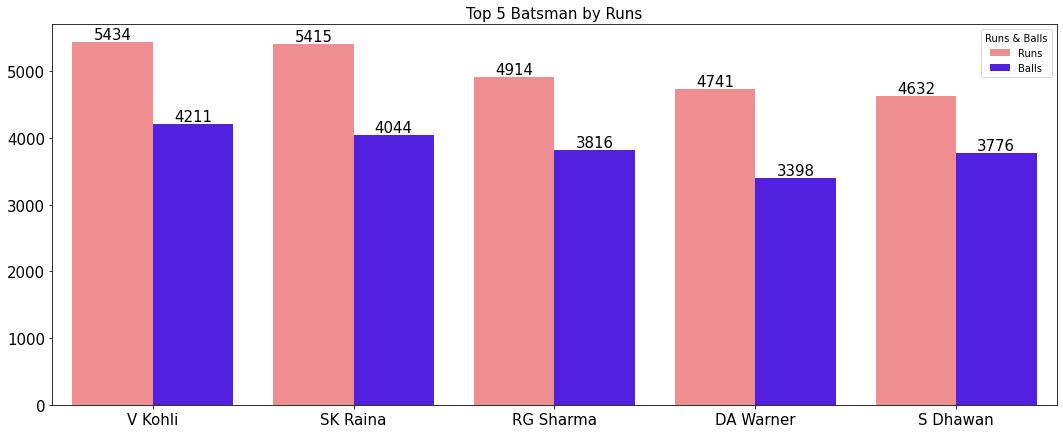

In [34]:
dots_runs = most_played[["Batsman", "Runs", "Balls"]]
dots_runs = dots_runs.melt("Batsman", var_name = "Runs & Balls", value_name = "Count")

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Batsman", y = "Count", hue = "Runs & Balls", data = dots_runs, palette = "gnuplot2_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Top 5 Batsman by Runs", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

**Batsmans Having Runs between 2500 to 3500 and Strike Rate 125+**

In [35]:
dots = df_d[df_d["batsman_runs"] == 0]
batsman_dots = dots.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
fours = df_d[df_d["batsman_runs"] == 4]
batsman_fours = fours.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
sixes = df_d[df_d["batsman_runs"] == 6]
batsman_sixes = sixes.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
batsman_balls = df_d.groupby("batsman")["ball"].agg(["count"]).astype("int")
batsman_runs = df_d.groupby("batsman")["batsman_runs"].agg(["sum"]).astype("int")
batsman_dismissed = df_d.groupby("player_dismissed")["player_dismissed"].agg(["count"]).astype("int")
batsman_played = pd.concat([batsman_balls, batsman_runs, batsman_fours, batsman_sixes, batsman_dismissed, batsman_dots], axis = 1).reset_index()
batsman_played.columns = ["Batsman", "Balls", "Runs", "Fours", "Sixes", "Dismissals", "Dots"]
batsman_played = batsman_played.sort_values(by = "Runs", ascending = False)
batsman_played = batsman_played.head(50) 
batsman_played["Overs"] = (batsman_played["Balls"] / 6).astype("int")
batsman_played["Strike Rate"] = (batsman_played["Runs"] / batsman_played["Balls"]) * 100
batsman_played = batsman_played.sort_values(by = "Runs", ascending = False)
most_played = batsman_played[["Batsman", "Dismissals", "Overs", "Balls", "Runs", "Dots", "Sixes", "Fours", "Strike Rate"]] 
most_played

bats_range = most_played[(most_played["Runs"] > 2500) & (most_played["Runs"] < 3500) & (most_played["Strike Rate"] > 125)]
bats_range

,Batsman,Dismissals,Overs,Balls,Runs,Dots,Sixes,Fours,Strike Rate
509,YK Pathan,110.0,389,2334.0,3241.0,856.0,161.0,264.0,138.860326
72,BB McCullum,104.0,378,2272.0,2893.0,1022.0,129.0,293.0,127.332746
213,KA Pollard,97.0,327,1964.0,2784.0,756.0,175.0,182.0,141.751527
514,Yuvraj Singh,111.0,367,2207.0,2765.0,967.0,149.0,218.0,125.283190
488,V Sehwag,99.0,305,1833.0,2728.0,737.0,106.0,334.0,148.827059


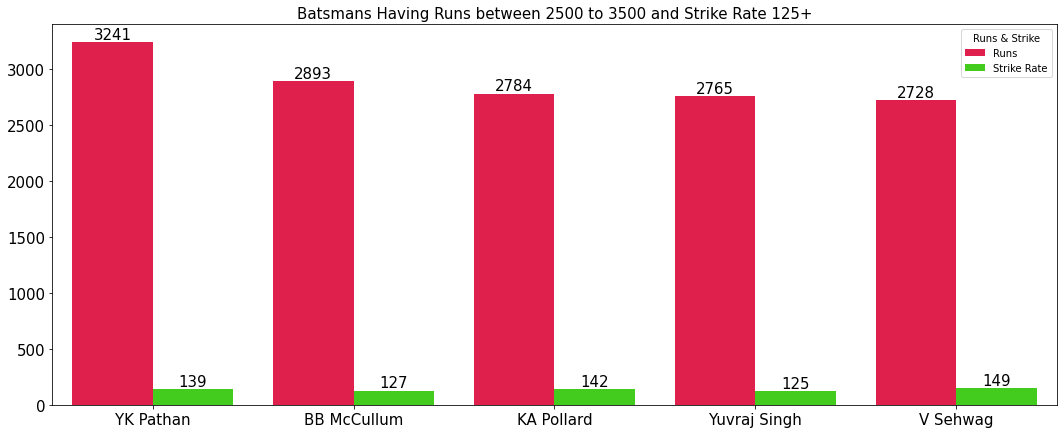

In [36]:
strike_runs = bats_range[["Batsman", "Runs", "Strike Rate"]]
strike_runs = strike_runs.melt("Batsman", var_name = "Runs & Strike", value_name = "Count")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Batsman", y = "Count", hue = "Runs & Strike", data = strike_runs, palette = "prism_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Batsmans Having Runs between 2500 to 3500 and Strike Rate 125+", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

**Top 5 Batsman by Fours**

In [37]:
dots = df_d[df_d["batsman_runs"] == 0]
batsman_dots = dots.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
fours = df_d[df_d["batsman_runs"] == 4]
batsman_fours = fours.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
sixes = df_d[df_d["batsman_runs"] == 6]
batsman_sixes = sixes.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
batsman_balls = df_d.groupby("batsman")["ball"].agg(["count"]).astype("int")
batsman_runs = df_d.groupby("batsman")["batsman_runs"].agg(["sum"]).astype("int")
batsman_dismissed = df_d.groupby("player_dismissed")["player_dismissed"].agg(["count"]).astype("int")
batsman_fours = pd.concat([batsman_balls, batsman_runs, batsman_fours, batsman_sixes, batsman_dismissed, batsman_dots], axis = 1).reset_index()
batsman_fours.columns = ["Batsman", "Balls", "Runs", "Fours", "Sixes", "Dismissals", "Dots"]
batsman_fours = batsman_fours.sort_values(by = "Fours", ascending = False)
batsman_fours_5 = batsman_fours.head()
batsman_fours_5["Overs"] = (batsman_fours_5["Balls"] / 6).astype("int")
batsman_fours_5["Strike Rate"] = (batsman_fours_5["Runs"] / batsman_fours_5["Balls"]) * 100
most_fours = batsman_fours_5[["Batsman", "Dismissals", "Overs", "Balls", "Runs", "Dots", "Sixes", "Fours", "Strike Rate"]] 
most_fours

,Batsman,Dismissals,Overs,Balls,Runs,Dots,Sixes,Fours,Strike Rate
392,S Dhawan,137.0,629,3776.0,4632.0,1455.0,96.0,526.0,122.669492
428,SK Raina,162.0,674,4044.0,5415.0,1381.0,195.0,495.0,133.902077
147,G Gambhir,136.0,587,3524.0,4223.0,1351.0,59.0,492.0,119.835414
486,V Kohli,143.0,701,4211.0,5434.0,1493.0,191.0,482.0,129.042983
112,DA Warner,110.0,566,3398.0,4741.0,1254.0,181.0,459.0,139.523249


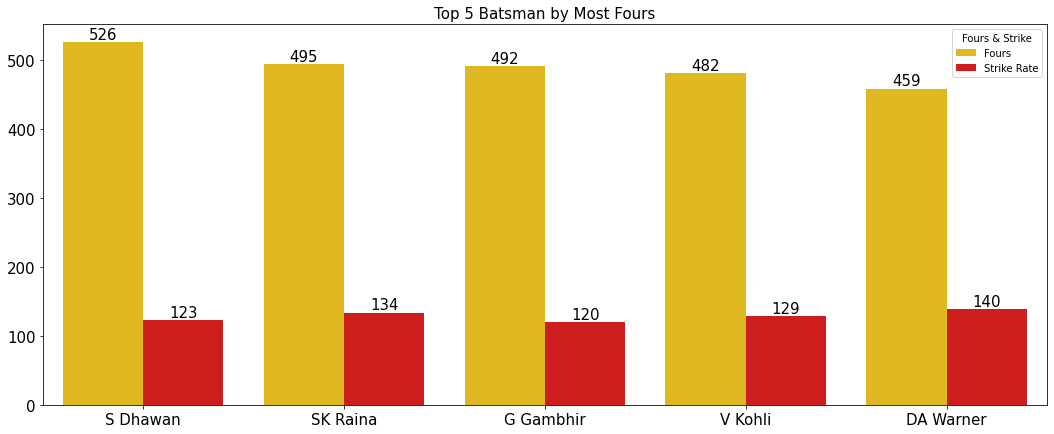

In [38]:
data = most_fours[["Batsman", "Fours", "Strike Rate"]]
most_fours_sixes = data.melt("Batsman", var_name = "Fours & Strike", value_name = "Count")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Batsman", y = "Count", hue = "Fours & Strike", data = most_fours_sixes, palette = "hot_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Top 5 Batsman by Most Fours", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Top 5 Batsman by Sixes**

In [39]:
dots = df_d[df_d["batsman_runs"] == 0]
batsman_dots = dots.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
fours = df_d[df_d["batsman_runs"] == 4]
batsman_fours = fours.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
sixes = df_d[df_d["batsman_runs"] == 6]
batsman_sixes = sixes.groupby("batsman")["batsman_runs"].agg(["count"]).astype("int")
batsman_balls = df_d.groupby("batsman")["ball"].agg(["count"]).astype("int")
batsman_runs = df_d.groupby("batsman")["batsman_runs"].agg(["sum"]).astype("int")
batsman_dismissed = df_d.groupby("player_dismissed")["player_dismissed"].agg(["count"]).astype("int")
batsman_sixes = pd.concat([batsman_balls, batsman_runs, batsman_fours, batsman_sixes, batsman_dismissed, batsman_dots], axis = 1).reset_index()
batsman_sixes.columns = ["Batsman", "Balls", "Runs", "Fours", "Sixes", "Dismissals", "Dots"]
batsman_sixes = batsman_sixes.sort_values(by = "Sixes", ascending = False)
batsman_sixes_5 = batsman_sixes.head()
batsman_sixes_5["Overs"] = (batsman_sixes_5["Balls"] / 6).astype("int")
batsman_sixes_5["Strike Rate"] = (batsman_sixes_5["Runs"] / batsman_sixes_5["Balls"]) * 100
most_sixes = batsman_sixes_5[["Batsman", "Dismissals", "Overs", "Balls", "Runs", "Dots", "Sixes", "Fours", "Strike Rate"]] 
most_sixes

,Batsman,Dismissals,Overs,Balls,Runs,Dots,Sixes,Fours,Strike Rate
92,CH Gayle,109.0,521,3131.0,4560.0,1423.0,327.0,376.0,145.640370
26,AB de Villiers,110.0,496,2977.0,4428.0,940.0,214.0,357.0,148.740343
290,MS Dhoni,105.0,553,3318.0,4477.0,1111.0,207.0,297.0,134.930681
428,SK Raina,162.0,674,4044.0,5415.0,1381.0,195.0,495.0,133.902077
367,RG Sharma,155.0,636,3816.0,4914.0,1390.0,194.0,431.0,128.773585


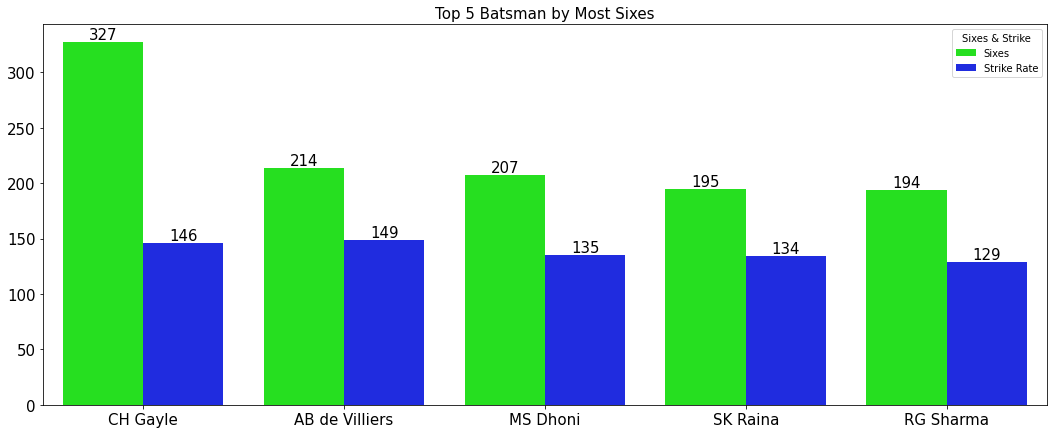

In [40]:
sixes = most_sixes[["Batsman", "Sixes", "Strike Rate"]]
sixes_batsman = sixes.melt("Batsman", var_name = "Sixes & Strike", value_name = "Count")
sixes_batsman

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Batsman", y = "Count", hue = "Sixes & Strike", data = sixes_batsman, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Top 5 Batsman by Most Sixes", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

**Top 5 Most Wicket Takers in IPL**

In [41]:
runs_conceded = df_d.groupby("bowler")["batsman_runs"].agg(["sum"])
dots = df_d[df_d["batsman_runs"] == 0]
dots = dots.groupby("bowler")["batsman_runs"].agg(["count"]).astype("int")
fours = df_d[df_d["batsman_runs"] == 4]
bowler_fours = fours.groupby("bowler")["batsman_runs"].agg(["count"]).astype("int")
sixes = df_d[df_d["batsman_runs"] == 6]
bowler_sixes = sixes.groupby("bowler")["batsman_runs"].agg(["count"]).astype("int")
bowlers_balls = df_d.groupby("bowler")["ball"].agg(["count"])
bowlers_wickets = df_d.groupby("bowler")["player_dismissed"].agg(["count"])
balls_wickets = pd.concat([bowlers_balls, runs_conceded, bowler_fours, bowler_sixes, dots, bowlers_wickets], axis = 1).reset_index()
balls_wickets.columns = ["Bowler", "Balls", "Runs", "Fours", "Sixes", "Dots", "Wickets"]
balls_wickets["Economy"] = ((balls_wickets["Runs"] / balls_wickets["Balls"]) * 6)
balls_wickets["Overs"] = (balls_wickets["Balls"] / 6).astype("int")
balls_wickets["Matches"] = (balls_wickets["Overs"] / 4).astype("int")
balls_wickets = balls_wickets.sort_values(by = "Wickets", ascending = False)
balls_wickets_5 = balls_wickets.head()
wicket_takers = balls_wickets_5[["Bowler", "Matches", "Wickets", "Overs", "Balls", "Runs", "Fours", "Sixes", "Dots", "Economy"]]
wicket_takers

,Bowler,Matches,Wickets,Overs,Balls,Runs,Fours,Sixes,Dots,Economy
340,SL Malinga,123,188,495,2974,3218,316.0,86.0,1340.0,6.492266
93,DJ Bravo,112,168,451,2711,3532,291.0,134.0,958.0,7.817042
7,A Mishra,132,165,528,3172,3727,218.0,170.0,1193.0,7.049811
126,Harbhajan Singh,143,161,575,3451,3880,289.0,142.0,1358.0,6.745871
264,PP Chawla,131,156,526,3157,4022,305.0,171.0,1156.0,7.643966


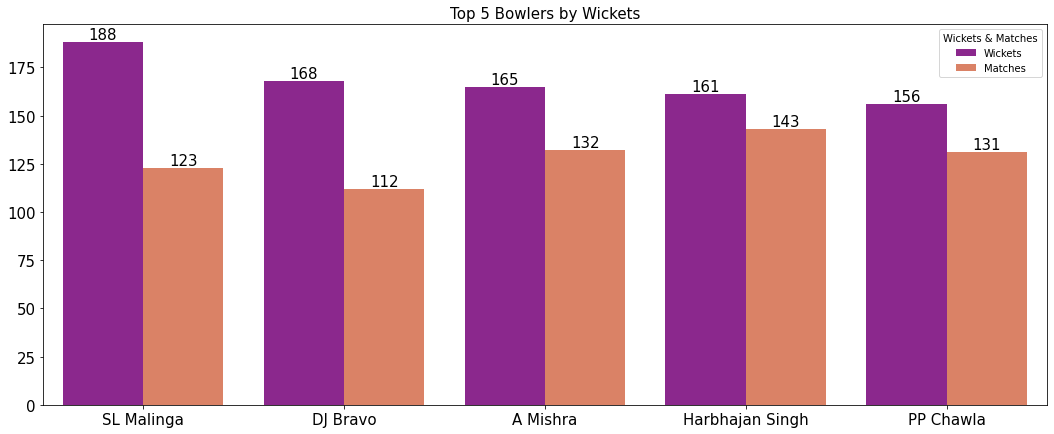

In [42]:
wickets_matches = wicket_takers[["Bowler", "Wickets", "Matches"]]
wickets_matches = wickets_matches.melt("Bowler", var_name = "Wickets & Matches", value_name = "Count")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Bowler", y = "Count", hue = "Wickets & Matches", data = wickets_matches, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Top 5 Bowlers by Wickets", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

**Bowlers having Wickets greater than 50 and less than 100 and Economy less than 7**

In [43]:
bowler_wickets = df_d.groupby("bowler")["player_dismissed"].agg(["count"])
bowler_balls = df_d.groupby("bowler")["ball"].agg(["count"])
bowler_runs = df_d.groupby("bowler")["batsman_runs"].agg(["sum"])

dots = df_d[df_d["batsman_runs"] == 0]
dots = dots.groupby("bowler")["batsman_runs"].agg(["count"]).astype("int")
fours = df_d[df_d["batsman_runs"] == 4]
bowler_fours = fours.groupby("bowler")["batsman_runs"].agg(["count"]).astype("int")
sixes = df_d[df_d["batsman_runs"] == 6]
bowler_sixes = sixes.groupby("bowler")["batsman_runs"].agg(["count"]).astype("int")

wickets_balls_runs = pd.concat([bowler_wickets, bowler_balls, dots, bowler_runs, bowler_fours, bowler_sixes], axis = 1).reset_index()
wickets_balls_runs.columns = ["Bowler", "Wickets", "Balls", "Dots", "Runs", "Fours", "Sixes"]
wickets_balls_runs["Overs"] = (wickets_balls_runs["Balls"] / 6).astype("int")
wickets_balls_runs["Economy"] = (wickets_balls_runs["Runs"] / wickets_balls_runs["Balls"]) * 6
wickets_balls_runs["Matches"] = (wickets_balls_runs["Overs"] / 4).astype("int")

bowlers = wickets_balls_runs[(wickets_balls_runs["Wickets"] > 50) & (wickets_balls_runs["Wickets"] < 130) & (wickets_balls_runs["Economy"] < 7)]
bowlers

,Bowler,Wickets,Balls,Dots,Runs,Fours,Sixes,Overs,Economy,Matches
108,DW Steyn,104,2207,1128.0,2283,272.0,48.0,367,6.206615,91
207,M Muralitharan,67,1581,695.0,1642,105.0,67.0,263,6.231499,65
265,PP Ojha,99,1945,753.0,2261,146.0,97.0,324,6.974807,81
301,Rashid Khan,60,1106,455.0,1214,92.0,47.0,184,6.585895,46
339,SK Warne,60,1223,471.0,1408,91.0,56.0,203,6.907604,50


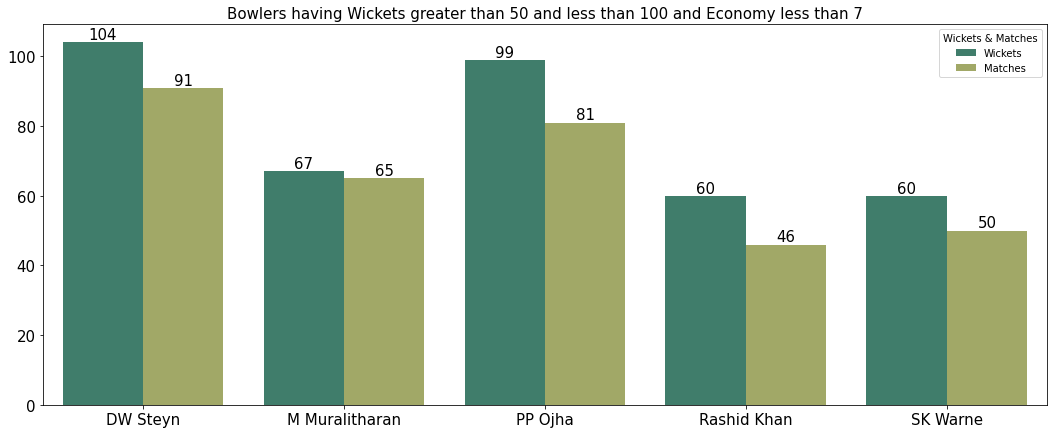

In [44]:
wickets_economy = bowlers[["Bowler", "Wickets", "Matches"]]
wickets_economy = wickets_economy.melt("Bowler", var_name = "Wickets & Matches", value_name = "Count")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Bowler", y = "Count", hue = "Wickets & Matches", data = wickets_economy, palette = "gist_earth")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Bowlers having Wickets greater than 50 and less than 100 and Economy less than 7", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

**Find Top Batting All Rounders having runs greater than 2000 and wickets greater than 50**

In [45]:
batting = df_d.groupby("batsman")["batsman_runs"].agg(["sum"])
bowling = df_d.groupby("bowler")["player_dismissed"].agg(["count"])
batting_bowling = pd.concat([batting, bowling], axis = 1).reset_index()
batting_bowling.columns = ["Player", "Runs", "Wickets"]
batting_bowling = batting_bowling.dropna()
all_rounder = batting_bowling[(batting_bowling["Runs"] > 2000) & (batting_bowling["Wickets"] > 50)]
all_rounder.sort_values(by = "Runs", ascending = False)

,Player,Runs,Wickets
444,SR Watson,3614.0,107.0
213,KA Pollard,2784.0,67.0
196,JH Kallis,2427.0,74.0


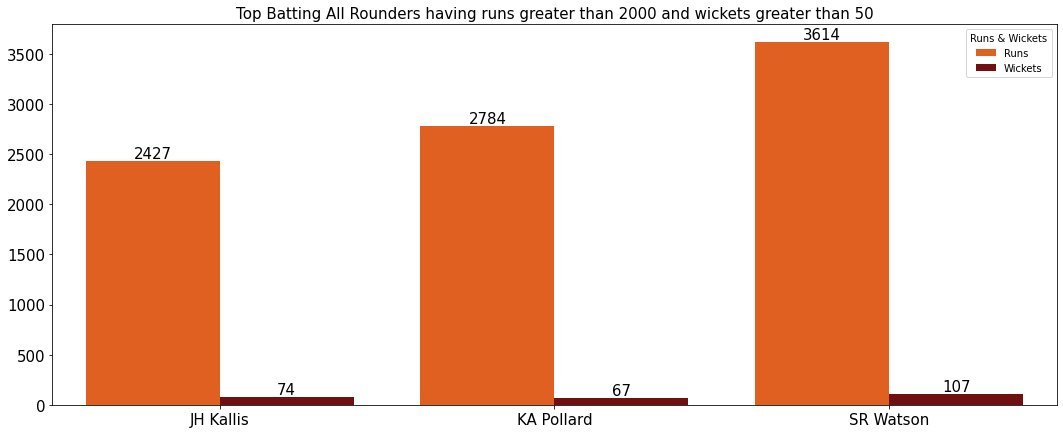

In [46]:
batsman_stats = all_rounder.melt("Player", var_name = "Runs & Wickets", value_name = "Count")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Player", y = "Count", hue = "Runs & Wickets", data = batsman_stats, palette = "gist_heat_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Top Batting All Rounders having runs greater than 2000 and wickets greater than 50", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Find Top Bowling Allrounders having runs greater than 1000 and wickets greater than 100**

In [47]:
batting = df_d.groupby("batsman")["batsman_runs"].agg(["sum"])
bowling = df_d.groupby("bowler")["player_dismissed"].agg(["count"])
batting_bowling = pd.concat([batting, bowling], axis = 1).reset_index()
batting_bowling.columns = ["Player", "Runs", "Wickets"]
batting_bowling = batting_bowling.dropna()
all_rounder = batting_bowling[(batting_bowling["Runs"] > 1000) & (batting_bowling["Wickets"] > 100)]
all_rounder.sort_values(by = "Wickets", ascending = False)

,Player,Runs,Wickets
118,DJ Bravo,1498.0,168.0
361,RA Jadeja,1951.0,116.0
444,SR Watson,3614.0,107.0


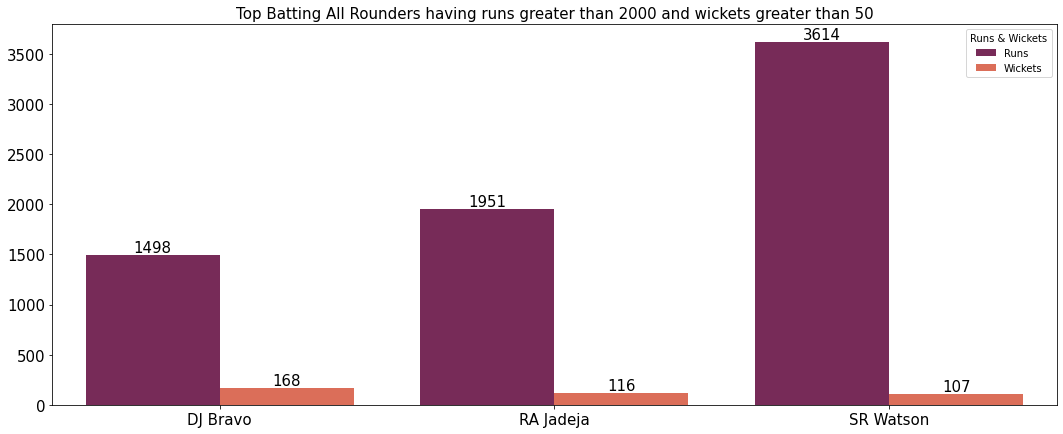

In [48]:
bowler_stats = all_rounder.melt("Player", var_name = "Runs & Wickets", value_name = "Count")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Player", y = "Count", hue = "Runs & Wickets", data = bowler_stats, palette = "rocket")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Top Batting All Rounders having runs greater than 2000 and wickets greater than 50", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Top 5 Best Wicket Keepers**

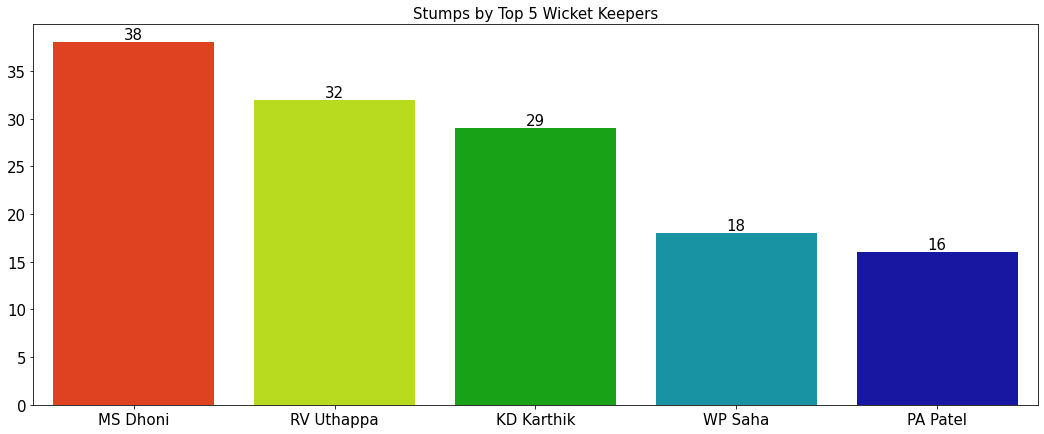

In [49]:
stumps = df_d[df_d["dismissal_kind"] == "stumped"]
wk_stumps = stumps.groupby("fielder")["dismissal_kind"].agg(["count"]).reset_index()
wk_stumps.columns = ["Wicket Keepers", "Stumps"]
wk_stumps = wk_stumps.sort_values(by = "Stumps", ascending = False)
wk_stumps_5 = wk_stumps.head()
wk_stumps_5

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Wicket Keepers", y = "Stumps", data = wk_stumps_5, palette = "nipy_spectral_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Stumps by Top 5 Wicket Keepers", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# Targeted Players

In [56]:
players = pd.DataFrame({"Players": ["Chris Gayle",
                                    "David Warner",
                                    "Virat Kohli",
                                    "AB De Villiers",
                                    "Shane Watson",
                                    "MS Dhoni",
                                    "Kieron Pollard",
                                    "Ravindara Jadeja",
                                    "Rashid Khan",
                                    "Dale Styn",
                                    "Lasith Malinga"],
                        "Role": ["Batting",
                                 "Batting",
                                 "Batting",
                                 "Batting",
                                 "Batting / Bowling",
                                 "Batting / Wicket Keeping",
                                 "Batting / Bowling",
                                 "Spin / Batting",
                                 "Spin / Batting",
                                 "Bowling",
                                 "Bowling"]})
players

,Players,Role
0,Chris Gayle,Batting
1,David Warner,Batting
2,Virat Kohli,Batting
3,AB De Villiers,Batting
4,Shane Watson,Batting / Bowling
5,MS Dhoni,Batting / Wicket Keeping
6,Kieron Pollard,Batting / Bowling
7,Ravindara Jadeja,Spin / Batting
8,Rashid Khan,Spin / Batting
9,Dale Styn,Bowling
